## DSC 540
### Term Paper

**Author:** Kimberly Cable

**Semester:** Summer, 2022

## Milestone 1

### About

National Parks in the United States are a favorite vacation destination for many outdoor enthusiasts.  I would like to find out which of the National Parks is best to visit and hike. 

### Plan of Attack

Each of the three data sources has its own unique information but also some overlap.  The National Parks API has all information about each of the national parks in its system. The National Parks Trails CSV is derived from the AllTrails website and has information on the trails located in the National Parks. The National Parks elevation table from Wikipedia is a table of the highest and lowest elevations in 63 National Parks.
Initially. looking at the data for each source, the National Parks API looks to be the parent as it has the most accurate information coming directly from the National Parks Service. I will be using the park’s endpoint to get data about all the National Parks in its database. The CSV file contains the name of the National Park which I will use to connect it to the API data.  The website also has the National Park name which will connect to the API data.

I do not see any major ethical implications for my study.  It is looking at trails in the National  Parks.  It does have information such as user rankings and popularity ranks.  These can be very subjective and what one person likes in a trail is not always what another person likes.

Some of the challenges I see, is the National Park name may be misspelled or spelled differently in each data source.  Also, there is also duplicate information that needs to be consolidated. Many of the fields need to be converted to their appropriate type and checked for empty cells and the website has data that looks different in some of the columns which will need to be fixed.


### Data Sources

* National Park Service API
    1. This API has information about each of the National Parks in the United States.  Information such as facilities, locations, activities, descriptions, etc.
    2. https://www.nps.gov/subjects/developer/api-documentation.htm
* National Park Trails – CSV file
    1. List of trails in the National Parks. Information such as trail names, which National Park it is in, elevation, difficulty, etc.
    2. https://www.kaggle.com/datasets/planejane/national-park-trails
* Website: List of national parks of the United States by elevation
    1. Wikipedia page of the highest and lowest points in each of the United States National Parks.
    2. https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States_by_elevation


### Relationships

* API: Contains json data per National Park.  
    1. Key: data.fullName
* CSV file: Contains 1 row per trail
    1. Key: Column Name: area_name
* Website: Contains 1 row per national park
    1. Key: Column Name: Park
* All Three:
    1. All related by National Park name
    2. API to CSV has a 1 to many relationship with fullName to area_name as key
    3. API to Website has 1 to 1 relationship with fullName to name.

### Data Dictionary

#### National Park Trails - CSV file
#### (18 columns x 3313 rows)

| Column | Description |
|--------|-------------|
| trail_id | Unique trail id |
| name | Name of the trail |
| area_name | Name of the National Park trail is located |
| city_name | Name of the city the trail is located |
| state_name | Name of the state the trail is located |
| country_name | Name of the country the trail is located |
| _geoloc | Latitude and longitude (key-value) of the trails location |
| popularity | Popularity (%) of the trail |
| length | Length in feet of the trail |
| elevation_gain | Elevation gain of the trail |
| difficulty_rating | Difficulty rating (1 – 5) of the trail |
| route_type | Route type: out and back, loop, point to point |
| visitor_usage | Visitor usage rating: light, moderate, heavy |
| avg_rating | Average rating (1 to 5) – can be ½ stars |
| num_reviews | Number of reviews |
| features | Array of features the trail has |
| activities | Array of the activities a trail has |
| units | Units: i or m |


#### List of national parks of the United States by elevation (Wikipedia Website)
#### (9 columns x 63 rows)

| Column | Description |
|--------|-------------|
| Rank | Rank of national park in terms of highest elevation |
| Park | Name of National Park |
| Location | Image of State Flag. \<img alt\> has name of state, can be multiple states |
| Peak name | Name of the highest peak – can be a sentence and has annotations |
| Mountain Range | Name of the Mountain Range of peak |
| Elevation | Elevation of the highest peak in feet and meters |
| Location of lowest point | Name of the lowest elevation point |
| Minimum elevation | Lowest elevation in feet and meters |
| Vertical relief | Vertical feet and meters |

#### National Parks  API (API: json data)
#### (466 rows)

In [1]:
%%capture
'''
Example Response:

{
    "total": "466",
    "limit": "600",
    "start": "0",
    "data": [
        {
            "id": "77E0D7F0-1942-494A-ACE2-9004D2BDC59E",
            "url": "https://www.nps.gov/abli/index.htm",
            "fullName": "Abraham Lincoln Birthplace National Historical Park",
            "parkCode": "abli",
            "description": "For over a century people from around the world have come to rural Central Kentucky to honor the humble beginnings of our 16th president, Abraham Lincoln. His early life on Kentucky's frontier shaped his character and prepared him to lead the nation through Civil War. The country's first memorial to Lincoln, built with donations from young and old, enshrines the symbolic birthplace cabin.",
            "latitude": "37.5858662",
            "longitude": "-85.67330523",
            "latLong": "lat:37.5858662, long:-85.67330523",
            "activities": [
                {
                    "id": "13A57703-BB1A-41A2-94B8-53B692EB7238",
                    "name": "Astronomy"
                },
                {
                    "id": "D37A0003-8317-4F04-8FB0-4CF0A272E195",
                    "name": "Stargazing"
                }
            ],
            "topics": [
                {
                    "id": "D10852A3-443C-4743-A5FA-6DD6D2A054B3",
                    "name": "Birthplace"
                },
                {
                    "id": "F669BC40-BDC4-41C0-9ACE-B2CD25373045",
                    "name": "Presidents"
                }
            ],
            "states": "KY",
            "contacts": {
                "phoneNumbers": [
                    {
                        "phoneNumber": "2703583137",
                        "description": "",
                        "extension": "",
                        "type": "Voice"
                    },
                    {
                        "phoneNumber": "2703583874",
                        "description": "",
                        "extension": "",
                        "type": "Fax"
                    }
                ],
                "emailAddresses": [
                    {
                        "description": "",
                        "emailAddress": "ABLI_Administration@nps.gov"
                    }
                ]
            },
            "entranceFees": [
                {
                    "cost": "0.00",
                    "description": "There is no fee associated with visiting either unit of the park.",
                    "title": "Fee Free Park"
                }
            ],
            "entrancePasses": [],
            "fees": [],
            "directionsInfo": "The Birthplace Unit of the park is located approximately 2 miles south of the town of Hodgenville on U.S. Highway 31E South. The Boyhood Home Unit at Knob Creek is located approximately 10 miles northeast of the Birthplace Unit of the park.",
            "directionsUrl": "http://www.nps.gov/abli/planyourvisit/directions.htm",
            "operatingHours": [
                {
                    "exceptions": [
                        {
                            "exceptionHours": {},
                            "startDate": "2022-11-24",
                            "name": "Park is Closed",
                            "endDate": "2022-11-24"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2022-12-26",
                            "name": "Park is Closed",
                            "endDate": "2022-12-26"
                        },
                        {
                            "exceptionHours": {},
                            "startDate": "2023-01-02",
                            "name": "Park is Closed",
                            "endDate": "2023-01-02"
                        }
                    ],
                    "description": "The Memorial Building is open 9:00 am - 4:30 pm eastern time with a limited viewing area.  The Visitor Center and grounds of the Birthplace Unit are open 9:00 am - 5:00 pm eastern time with one-way traffic flow and social distancing.\n\n\nThe Boyhood Home Unit at Knob Creek grounds are open daily sunup to sundown. The buildings are closed for the winter.",
                    "standardHours": {
                        "wednesday": "9:00AM - 5:00PM",
                        "monday": "9:00AM - 5:00PM",
                        "thursday": "9:00AM - 5:00PM",
                        "sunday": "9:00AM - 5:00PM",
                        "tuesday": "9:00AM - 5:00PM",
                        "friday": "9:00AM - 5:00PM",
                        "saturday": "9:00AM - 5:00PM"
                    },
                    "name": "Abraham Lincoln Birthplace National Historical Park"
                }
            ],
            "addresses": [
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Physical",
                    "line3": "",
                    "line2": ""
                },
                {
                    "postalCode": "42748",
                    "city": "Hodgenville",
                    "stateCode": "KY",
                    "line1": "2995 Lincoln Farm Road",
                    "type": "Mailing",
                    "line3": "",
                    "line2": ""
                }
            ],
            "images": [
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building with fall colors",
                    "altText": "The Memorial Building surrounded by fall colors",
                    "caption": "Over 200,000 people a year come to walk up the steps of the Memorial Building to visit the site where Abraham Lincoln was born",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861078-1DD8-B71B-0B774A242EF6A706.jpg"
                },
                {
                    "credit": "NPS Photo",
                    "title": "The Memorial Building",
                    "altText": "The first memorial erected to honor Abraham Lincoln",
                    "caption": "The Memorial Building constructed on the traditional site of the birth of Abraham Lincoln.",
                    "url": "https://www.nps.gov/common/uploads/structured_data/3C861263-1DD8-B71B-0B71EF9B95F9644F.jpg"
                }
            ],
            "weatherInfo": "There are four distinct seasons in Central Kentucky. However, temperature and weather conditions can vary widely within those seasons. Spring and Fall are generally pleasant with frequent rain showers. Summer is usually hot and humid. Winter is moderately cold with mixed precipitation.",
            "name": "Abraham Lincoln Birthplace",
            "designation": "National Historical Park"
        }
'''

## Milestone 2: Cleaning/Formatting Flat File Source

Perform at least 5 data transformation and/or cleansing steps to your flat file data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformation. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Read data file
try:
    trails_df = pd.read_csv("AllTrails data - nationalpark.csv")
except Exception:
    print("There was an error reading the Trails file")
    
trails_df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [4]:
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail_id           3313 non-null   int64  
 1   name               3313 non-null   object 
 2   area_name          3313 non-null   object 
 3   city_name          3313 non-null   object 
 4   state_name         3313 non-null   object 
 5   country_name       3313 non-null   object 
 6   _geoloc            3313 non-null   object 
 7   popularity         3313 non-null   float64
 8   length             3313 non-null   float64
 9   elevation_gain     3313 non-null   float64
 10  difficulty_rating  3313 non-null   int64  
 11  route_type         3313 non-null   object 
 12  visitor_usage      3060 non-null   float64
 13  avg_rating         3313 non-null   float64
 14  num_reviews        3313 non-null   int64  
 15  features           3313 non-null   object 
 16  activities         3313 

In [5]:
# Check empty values
trails_df.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [6]:
# Get summary statstics on numerical data
trails_df.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [7]:
# Get summary statistics on non-numerical data
trails_df.describe(include = ['O'])

,name,area_name,city_name,state_name,country_name,_geoloc,route_type,features,activities,units
count,3313,3313,3313,3313,3313,3313,3313,3313,3313,3313
unique,3288,60,282,30,2,3264,3,744,526,2
top,Black Canyon Trail,Great Smoky Mountains National Park,Yellowstone National Park,California,United States,"{'lat': 43.65579, 'lng': -110.7811}",out and back,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'walking']",i
freq,3,293,206,707,3264,4,1906,175,450,3264


In [8]:
# Create a copy of dataframe for cleaned
trails_cleaned = trails_df

### Step 1: Correct Maui being a state

Change Maui as a state to Hawaii as the state and United States as the country

In [9]:
# Correct the Country from Hawaii to United States
trails_df['country_name'] = trails_df['country_name'].apply(lambda x: x.replace("Hawaii", "United States"))

# Correct the state from Maui to Hawaii
trails_df['state_name'] = trails_df['state_name'].apply(lambda x: x.replace("Maui", "Hawaii"))

In [10]:
trails_df.loc[trails_df['state_name'] == 'Hawaii'].head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3264,10010442,Kilauea Iki Trail and Crater Rim Trail,Hawaii Volcanoes National Park,Pahala,Hawaii,United States,"{'lat': 19.41648, 'lng': -155.24294}",25.6723,4828.02,209.7024,3,loop,3.0,4.5,473,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['hiking', 'nature-trips', 'walking']",m
3265,10266617,Kalapana Lava Viewing,Hawaii Volcanoes National Park,Pahoa,Hawaii,United States,"{'lat': 19.3557, 'lng': -154.98677}",11.3437,15288.73,196.9008,1,out and back,3.0,4.5,57,"['rails-trails', 'dogs-no', 'hot-springs', 'vi...","['birding', 'hiking', 'mountain-biking', 'natu...",m


### Step 2: Change length to feet

Convert meters to feet and convert inches to feet in the length column

In [11]:
# Function to convert length to feet
def convert (units, length):
    """ 
    Convert meters and inches to feet
    
    Args:
        units (string): i or m
        length (float): length
        
    Returns:
        length (float): length in inches
    """
    if units == 'm':
        length_feet = length * 39.3701 * 0.08333
    else:
        length_feet = length * 0.08333
    
    return length_feet

In [12]:
# Create new length column in feet
trails_df['length_feet'] = trails_df.apply(lambda item: convert(units = item['units'], length = item['length']), axis = 1)

# Drop length column
trails_df.drop(['length'], axis = 1, inplace = True)

# Drop units column
trails_df.drop(['units'], axis = 1, inplace = True)

In [13]:
trails_df.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099


### Step 3: Split out Latitude and Longitude

Take the _geoloc column and split out latitude and longitude into two separate columns

In [14]:
# Split _geoloc by ','
trails_df[['lat','lon']] = trails_df['_geoloc'].apply(lambda x: pd.Series(str(x).split(",")))

# Split lat by ':' and keep only numeric
trails_df['lat'] = trails_df['lat'].apply(lambda x: (x.split(':')[1].split()[-1])).astype(float)

# Split lon by ':' and keep only numeric
trails_df['lon'] = trails_df['lon'].apply(lambda x: (x.split(':')[1].split()[-1][:-1])).astype(float)

# Drop _geoloc column
trails_df.drop(['_geoloc'], axis = 1, inplace = True)

In [15]:
trails_df.head(2)

,trail_id,name,area_name,city_name,state_name,country_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968


### Step 4: Drop Country Name

Since all of the trails are in the United States, we do not need to country_name column

In [16]:
# Drop country_name column
trails_df.drop(['country_name'], axis = 1, inplace = True)

In [17]:
trails_df.head()

,trail_id,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 5:  Drop trail id

The trail id is not needed so we can drop it

In [18]:
# Drop trail_id column
trails_df.drop(['trail_id'], axis = 1, inplace = True)

In [19]:
trails_df.head()

,name,area_name,city_name,state_name,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 6: Rename Headers

Rename name, area_name, city_name, and state_name headers to trail, national_park, city, and state respectively

In [20]:
header_names = {'name': 'trail',
                'area_name': 'national_park',
                'city_name': 'city',
                'state_name': 'state'}

trails_df.rename(columns = header_names, inplace = True)
trails_df.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",576.657099,63.73049,-148.91968
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",241.391344,60.18879,-149.63100
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",281.623235,63.73661,-148.91500
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",2480.966591,63.73319,-148.89682


### Step 7: Fill Visitor Usage empty values

Fill visitor usage with 0\'s where its empty.

In [21]:
trails_df.fillna({'visitor_usage': 0}, inplace=True)

In [22]:
# Check empty values
trails_df.isnull().sum()

trail                0
national_park        0
city                 0
state                0
popularity           0
elevation_gain       0
difficulty_rating    0
route_type           0
visitor_usage        0
avg_rating           0
num_reviews          0
features             0
activities           0
length_feet          0
lat                  0
lon                  0
dtype: int64

### Step 8: Convert activities to string with comma delimited

In [23]:
def list_to_string(row):
    '''
    Convert "list" to string
    
    args:
        row (str): pretend list
        
    returns:
        values (str): strings delimited by commas
    '''
    values = row.replace("[", "").replace("]", "")
    return values

In [24]:
trails_df['activities_string'] = trails_df["activities"].apply(lambda x: list_to_string(x))
trails_df.head(1)

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon,activities_string
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156,"'birding', 'camping', 'hiking', 'nature-trips'..."


### Step 9: Convert features to string with comma delimited

In [25]:
trails_df['features_string'] = trails_df["features"].apply(lambda x: list_to_string(x))
trails_df.head(1)

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,length_feet,lat,lon,activities_string,features_string
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",1300.831131,60.18852,-149.63156,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'river', 'views', 'waterf..."


In [26]:
### Step 10: Rename activities_string and features_string and drop old

In [27]:
trails_df.drop(['activities'], axis = 1, inplace = True)
trails_df.drop(['features'], axis = 1, inplace = True)

header_names = {'activities_string': 'activities',
                'features_string': 'features'}

trails_df.rename(columns = header_names, inplace = True)

trails_df.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon,activities,features
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,1300.831131,60.18852,-149.63156,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'river', 'views', 'waterf..."
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,576.657099,63.73049,-148.91968,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,241.391344,60.18879,-149.63100,"'hiking', 'walking'","'dogs-no', 'partially-paved', 'views', 'wildlife'"
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,281.623235,63.73661,-148.91500,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-no', 'forest', 'lake', 'kids', 'views', ..."
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,2480.966591,63.73319,-148.89682,"'birding', 'fishing', 'hiking', 'nature-trips'...","'dogs-no', 'lake', 'views', 'wild-flowers', 'w..."


### Step 11: Check for duplicate trails

In [28]:
pd.concat(dup for _, dup in trails_df.groupby(["trail", "national_park"]) if len(dup) > 1)

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon,activities,features
1097,Black Canyon Trail,Rocky Mountain National Park,Estes Park,Colorado,6.6400,1158.8496,3,out and back,2.0,4.5,15,2078.647684,40.40150,-105.52102,"'camping', 'hiking', 'horseback-riding'","'dogs-no', 'lake', 'river', 'views'"
1125,Black Canyon Trail,Rocky Mountain National Park,Estes Park,Colorado,5.0681,520.9032,3,out and back,0.0,4.5,9,1005.797266,40.39644,-105.51289,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-no', 'views', 'wild-flowers', 'wildlife'"
452,Bubbs Creek Trail,Kings Canyon National Park,Hume,California,8.8560,1452.9816,5,out and back,2.0,4.5,10,3299.015034,36.79437,-118.58393,"'birding', 'hiking', 'nature-trips'","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
674,Bubbs Creek Trail,Kings Canyon National Park,Lone Pine,California,4.4179,1789.7856,5,out and back,2.0,4.5,6,2896.696128,36.77268,-118.34024,"'birding', 'hiking', 'nature-trips'","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
2719,Dege Peak Trail,Mount Rainier National Park,Ashford,Washington,12.6823,249.9360,3,out and back,2.0,4.5,60,415.729537,46.91734,-121.58929,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
2839,Dege Peak Trail,Mount Rainier National Park,Ashford,Washington,6.1504,237.7440,3,out and back,1.0,4.5,30,549.835839,46.91445,-121.64236,"'hiking', 'trail-running'","'dogs-no', 'views', 'wildlife'"
345,Dewey Point Trail,Yosemite National Park,Yosemite Valley,California,12.8074,306.9336,3,loop,1.0,4.5,48,1005.797266,37.66167,-119.66137,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
595,Dewey Point Trail,Yosemite National Park,Yosemite Valley,California,5.6176,154.8384,3,out and back,2.0,4.0,9,630.299620,37.67445,-119.65124,"'birding', 'hiking', 'nature-trips', 'walking'","'dogs-no', 'forest', 'views'"
2494,Furnace Mountain Trail,Shenandoah National Park,Grottoes,Virginia,9.7247,759.8664,3,out and back,2.0,4.0,47,1032.618527,38.25759,-78.77182,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-leash', 'forest', 'views', 'wild-flowers..."
2565,Furnace Mountain Trail,Shenandoah National Park,Grottoes,Virginia,4.8365,544.9824,3,out and back,2.0,4.0,10,871.690964,38.22282,-78.73359,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-leash', 'forest', 'views', 'wildlife'"


Not knowing about each trail, I'm going to keep all trails as there may be different "versions" with the same name.

### Step 12: Check for Outliers

In [29]:
trails_df.describe()

,popularity,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.00000
mean,8.953441,641.805943,3.167824,1.733776,4.173106,70.341986,2045.046540,39.671520,-106.38817
std,8.138323,901.506642,1.702752,0.832462,0.947039,184.118370,6741.978556,5.870789,17.75683
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.086090,-156.25357
25%,3.794100,116.738400,1.000000,1.000000,4.000000,5.000000,388.908276,36.335580,-118.77161
50%,6.573100,359.968800,3.000000,2.000000,4.500000,17.000000,925.333485,38.468380,-110.79927
75%,11.255600,833.932800,5.000000,2.000000,4.500000,57.000000,1850.666970,44.320420,-101.92792
max,84.622900,14029.944000,7.000000,4.000000,5.000000,3903.000000,190600.004870,63.883740,-68.03679


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'elevation_gain'}>,
        <AxesSubplot:title={'center':'difficulty_rating'}>],
       [<AxesSubplot:title={'center':'visitor_usage'}>,
        <AxesSubplot:title={'center':'avg_rating'}>,
        <AxesSubplot:title={'center':'num_reviews'}>],
       [<AxesSubplot:title={'center':'length_feet'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>]], dtype=object)

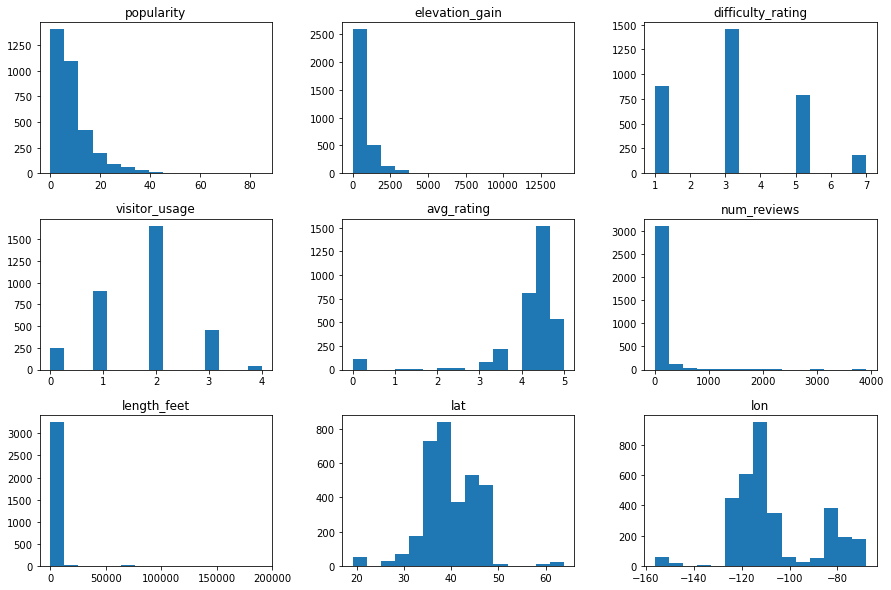

In [30]:
# Create histogram of numeric columns in dataset
trails_df.hist(bins = 15, figsize = (15, 10), grid = False)

Each of these features has a lot outliers.  I think with the nature of each of these features the outliers need to stay as each of the trails are very different.

### Final Dataset

In [31]:
trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trail              3313 non-null   object 
 1   national_park      3313 non-null   object 
 2   city               3313 non-null   object 
 3   state              3313 non-null   object 
 4   popularity         3313 non-null   float64
 5   elevation_gain     3313 non-null   float64
 6   difficulty_rating  3313 non-null   int64  
 7   route_type         3313 non-null   object 
 8   visitor_usage      3313 non-null   float64
 9   avg_rating         3313 non-null   float64
 10  num_reviews        3313 non-null   int64  
 11  length_feet        3313 non-null   float64
 12  lat                3313 non-null   float64
 13  lon                3313 non-null   float64
 14  activities         3313 non-null   object 
 15  features           3313 non-null   object 
dtypes: float64(7), int64(2),

In [32]:
trails_df.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon,activities,features
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,1300.831131,60.18852,-149.63156,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'river', 'views', 'waterf..."
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,576.657099,63.73049,-148.91968,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,241.391344,60.18879,-149.63100,"'hiking', 'walking'","'dogs-no', 'partially-paved', 'views', 'wildlife'"
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,281.623235,63.73661,-148.91500,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-no', 'forest', 'lake', 'kids', 'views', ..."
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,2480.966591,63.73319,-148.89682,"'birding', 'fishing', 'hiking', 'nature-trips'...","'dogs-no', 'lake', 'views', 'wild-flowers', 'w..."


**Conclusions:**

* There are a lot of outliers in the features and most are skewed mostly due to the data being user inputted.
    
* Ethical considerations: Most of the information is user input so the data is based on their experiences and data. This can be different from person to person.
    
* Some of the data flagged as duplicates may or may not be actual duplicates.  Without further research on each row flagged it is hard to say if the trail is actually a duplicate or not.

* As I progress with the other data and finally merge all together, there may be more preparation needed.

## Milestone 3: Cleaning/Formatting Website Data

Perform at least 5 data transformation and/or cleansing steps to your website data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformations. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [33]:
# import librarys
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [34]:
response = requests.get(
   url="https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States_by_elevation",
    )

if response.status_code == requests.codes.ok:       
    soup = BeautifulSoup(response.content, 'html.parser')

    title = soup.find(id="firstHeading")
    print(title.string)
else:
    print("Sorry, something went wrong")

List of national parks of the United States by elevation


In [35]:
# Find all wikitables that the elevation data is in
data_tables = soup.find_all("table", {"class": "wikitable"})
print(f"There are {len(data_tables)} tables")

There are 1 tables


In [36]:
# Get table data
elevations_data = data_tables[0]

In [37]:
# Get the header information
elevations_header = [th.getText().strip() for th in elevations_data.find_all('tbody')[0].find_all('th')]
elevations_header

['Rank',
 'Park',
 'Location',
 'Peak name',
 'Mountain range',
 'Elevation',
 'Location of lowest point',
 'Minimum elevation',
 'Vertical relief']

In [38]:
# Get the row information
elevations_rows = elevations_data.tbody.find_all("tr", recursive = False)[1:]
elevations_details = [[td.get_text().strip() for td in tr.find_all('td')] for tr in elevations_rows]

In [39]:
# Put data into a dictionary
elevations_df = pd.DataFrame(elevations_details, columns = elevations_header)
elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Elevation,Location of lowest point,Minimum elevation,Vertical relief
0,1,Denali,AK0573,Denali,Alaska Range,"20,310 feet (6,190 m)",Yentna River[1],240 feet (73 m),"20,070 feet (6,120 m)"
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,"18,008 feet (5,489 m)",Gulf of Alaska,0 feet (0 m),"18,008 feet (5,489 m)"
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,"15,300 feet (4,700 m)",Gulf of Alaska,0 feet (0 m),"15,300 feet (4,700 m)"
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,"14,505 feet (4,421 m)",Kaweah River[2],"1,360 feet (410 m)","13,145 feet (4,007 m)"
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,"14,411 feet (4,392 m)",Ohanapecosh River,"1,610 feet (490 m)","12,801 feet (3,902 m)"


In [40]:
def get_feet(string):
    '''
    Pull out feet from string and convert to integer
    
    args:
        string (str): feature string
        
    returns:
        feet (int): feature in feet
    '''
    # split string by spaces
    string_split = string.split()
    
    # use 1st element (feet needed) and then remove ',' and whitespace and convert to int
    feet = string_split[0].replace(',', '').strip()
    
    # if converting feet to numeric fails, convert negative to correct negative and convert
    try:
        feet = int(feet)
    except ValueError:        
        feet = feet.replace('\u2212', '-')
        feet = int(feet)
    
    return feet

### Step 1: Split Elevation and keep feet

In [41]:
# Split Elevation and keep feet
elevations_df['elevation_feet'] = elevations_df['Elevation'].apply(lambda x: get_feet(x))

# Drop Elevation column
elevations_df.drop(['Elevation'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Location of lowest point,Minimum elevation,Vertical relief,elevation_feet
0,1,Denali,AK0573,Denali,Alaska Range,Yentna River[1],240 feet (73 m),"20,070 feet (6,120 m)",20310
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"18,008 feet (5,489 m)",18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,Gulf of Alaska,0 feet (0 m),"15,300 feet (4,700 m)",15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,Kaweah River[2],"1,360 feet (410 m)","13,145 feet (4,007 m)",14505
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,Ohanapecosh River,"1,610 feet (490 m)","12,801 feet (3,902 m)",14411


### Step 2: Remove citation from Location of lowest point

In [42]:
import re

def remove_citation(location):
    return re.sub(r'\[\d+\]', '', location)

elevations_df['lowest_point'] = elevations_df['Location of lowest point'].apply(lambda x: remove_citation(x))

# Drop Lowest Point column
elevations_df.drop(['Location of lowest point'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Minimum elevation,Vertical relief,elevation_feet,lowest_point
0,1,Denali,AK0573,Denali,Alaska Range,240 feet (73 m),"20,070 feet (6,120 m)",20310,Yentna River
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,0 feet (0 m),"18,008 feet (5,489 m)",18008,Gulf of Alaska
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,0 feet (0 m),"15,300 feet (4,700 m)",15300,Gulf of Alaska
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,"1,360 feet (410 m)","13,145 feet (4,007 m)",14505,Kaweah River
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,"1,610 feet (490 m)","12,801 feet (3,902 m)",14411,Ohanapecosh River


### Step 3: Split Minimum elevation and keep feet

In [43]:
# Split Minimum elevation
elevations_df['min_elevation_feet'] = elevations_df['Minimum elevation'].apply(lambda x: get_feet(x))

# Drop Minimum elevation column
elevations_df.drop(['Minimum elevation'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,Vertical relief,elevation_feet,lowest_point,min_elevation_feet
0,1,Denali,AK0573,Denali,Alaska Range,"20,070 feet (6,120 m)",20310,Yentna River,240
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,"18,008 feet (5,489 m)",18008,Gulf of Alaska,0
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,"15,300 feet (4,700 m)",15300,Gulf of Alaska,0
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,"13,145 feet (4,007 m)",14505,Kaweah River,1360
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,"12,801 feet (3,902 m)",14411,Ohanapecosh River,1610


### Step 4: Split Vertical Relief and keep feet

In [44]:
# Split Vertical
elevations_df['vertical_relief_feet'] = elevations_df['Vertical relief'].apply(lambda x: get_feet(x))

# Drop Minimum elevation column
elevations_df.drop(['Vertical relief'], axis = 1, inplace = True)

elevations_df.head()

,Rank,Park,Location,Peak name,Mountain range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,1,Denali,AK0573,Denali,Alaska Range,20310,Yentna River,240,20070
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


### Step 5: Rename park to national_park

Rename Park to national_park, Peak name to peak_name, and Mountain range to mtn_range

In [45]:
header_names = {'Park': 'national_park',
                'Peak name': 'peak_name',
                'Mountain range': 'mtn_range'}

elevations_df.rename(columns = header_names, inplace = True)
elevations_df.head()

,Rank,national_park,Location,peak_name,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,1,Denali,AK0573,Denali,Alaska Range,20310,Yentna River,240,20070
1,2,Wrangell-St. Elias,AK0573,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,3,Glacier Bay,AK0573,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,4,Sequoia,CA0621,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,5,Mount Rainier,WA0621,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


### Step 6: Add "National Park" to end of park name

In [46]:
elevations_df['national_park'] = elevations_df['national_park'] + ' National Park'
elevations_df.head()

,Rank,national_park,Location,peak_name,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,1,Denali National Park,AK0573,Denali,Alaska Range,20310,Yentna River,240,20070
1,2,Wrangell-St. Elias National Park,AK0573,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,3,Glacier Bay National Park,AK0573,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,4,Sequoia National Park,CA0621,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,5,Mount Rainier National Park,WA0621,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


### Step 7: Drop Rank and Location as they are not needed

In [47]:
elevations_df.drop(['Rank'], axis = 1, inplace = True)
elevations_df.drop(['Location'], axis = 1, inplace = True)

elevations_df.head()

,national_park,peak_name,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,Denali National Park,Denali,Alaska Range,20310,Yentna River,240,20070
1,Wrangell-St. Elias National Park,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,Glacier Bay National Park,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,Sequoia National Park,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,Mount Rainier National Park,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


### Step 8 Get Summary Statistics

In [48]:
# Get column info
elevations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   national_park         63 non-null     object
 1   peak_name             63 non-null     object
 2   mtn_range             63 non-null     object
 3   elevation_feet        63 non-null     int64 
 4   lowest_point          63 non-null     object
 5   min_elevation_feet    63 non-null     int64 
 6   vertical_relief_feet  63 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.6+ KB


In [49]:
# Get summary statistics on numerical data
elevations_df.describe()

,elevation_feet,min_elevation_feet,vertical_relief_feet
count,63.000000,63.000000,63.000000
mean,7257.873016,2006.349206,5251.476190
std,4994.334734,2261.703356,4661.703492
min,9.000000,-282.000000,9.000000
25%,3170.000000,0.000000,1365.500000
50%,7606.000000,900.000000,4720.000000
75%,10327.000000,3638.000000,7533.000000
max,20310.000000,7630.000000,20070.000000


In [50]:
# Get summary statistics on non-numerical data
elevations_df.describe(include = ['O'])

,national_park,peak_name,mtn_range,lowest_point
count,63,63,63,63
unique,63,63,43,52
top,Denali National Park,Denali,,Pacific Ocean
freq,1,1,6,6


### Step 9: Check for outliers

array([[<AxesSubplot:title={'center':'elevation_feet'}>,
        <AxesSubplot:title={'center':'min_elevation_feet'}>],
       [<AxesSubplot:title={'center':'vertical_relief_feet'}>,
        <AxesSubplot:>]], dtype=object)

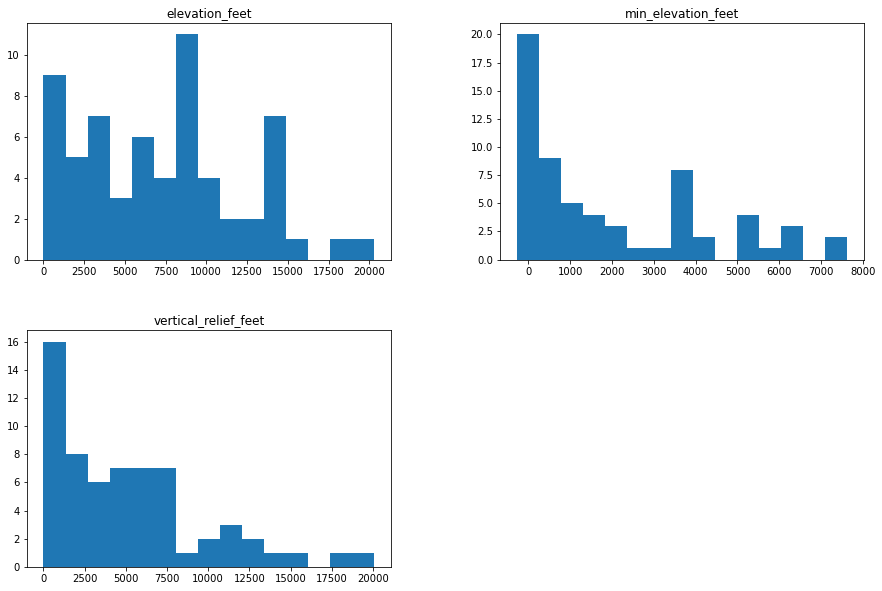

In [51]:
# Create histogram of numeric columns in dataset
elevations_df.hist(bins = 15, figsize = (15, 10), grid = False)

Due to the nature of the data, outliers are expected so I'll keep them.

### Final Dataset

In [52]:
elevations_df.head()

,national_park,peak_name,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,Denali National Park,Denali,Alaska Range,20310,Yentna River,240,20070
1,Wrangell-St. Elias National Park,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,Glacier Bay National Park,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,Sequoia National Park,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,Mount Rainier National Park,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


**Conclusions:**

* There are a lot of outliers in the data but due to the nature of the data is it expected.
    
* Ethical considerations: This data is maintained by "the people". Although it is monitored, there may be inaccurate information on the table within Wikipedia.

* As I progress with the other data and finally merge all together, there may be more preparation needed.

## Milestone 4: Connecting to an API/Pulling in the Data and Cleaning/Formatting

Perform at least 5 data transformation and/or cleansing steps to your API data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformations. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.
- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching

In [53]:
# import libraries
import os
import sys
import requests
from configparser import ConfigParser
import pandas as pd
import json

In [54]:
# Get API Key from file
config = ConfigParser()
config.read(os.path.join(sys.path[0], "secrets.ini"))

API_KEY = config["nationalparks"]["API_KEY"]

In [55]:
NATIONAL_PARKS_API_URL = 'https://developer.nps.gov/api/v1/parks?limit=600'

# Call API, exit out if exception raised
try:
    response = requests.request(
        "GET", NATIONAL_PARKS_API_URL, params = {'api_key': API_KEY},
    )
except requests.exceptions.HTTPError:
    print("We can't seem to locate the National Parks API.")
    print("Please try again later")
    sys.exit()
except requests.exceptions.RequestException:
    print("Seems the National Parks API is currently down.")
    print("Please try again later")
    sys.exit()

# Load data into json and return weather data
# otherwise print error and exit
if response.status_code == requests.codes.ok:
    parks_json = response.json()
else:
    print("Sorry, something went wrong! Please try again")

In [56]:
# Convert json data to dataframe
parks_df = pd.json_normalize(parks_json['data'])
parks_df.head()

,id,url,fullName,parkCode,description,latitude,longitude,latLong,activities,topics,...,directionsInfo,directionsUrl,operatingHours,addresses,images,weatherInfo,name,designation,contacts.phoneNumbers,contacts.emailAddresses
0,77E0D7F0-1942-494A-ACE2-9004D2BDC59E,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,abli,For over a century people from around the worl...,37.5858662,-85.67330523,"lat:37.5858662, long:-85.67330523",[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...,...,The Birthplace Unit of the park is located app...,http://www.nps.gov/abli/planyourvisit/directio...,"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'postalCode': '42748', 'city': 'Hodgenville'...","[{'credit': 'NPS Photo', 'title': 'The Memoria...",There are four distinct seasons in Central Ken...,Abraham Lincoln Birthplace,National Historical Park,"[{'phoneNumber': '2703583137', 'description': ...","[{'description': '', 'emailAddress': 'ABLI_Adm..."
1,6DA17C86-088E-4B4D-B862-7C1BD5CF236B,https://www.nps.gov/acad/index.htm,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,"lat:44.409286, long:-68.247501",[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,...,"From Boston take I-95 north to Augusta, Maine,...",http://www.nps.gov/acad/planyourvisit/directio...,"[{'exceptions': [], 'description': 'Acadia Nat...","[{'postalCode': '04609', 'city': 'Bar Harbor',...","[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...","Located on Mount Desert Island in Maine, Acadi...",Acadia,National Park,"[{'phoneNumber': '2072883338', 'description': ...","[{'description': '', 'emailAddress': 'acadia_i..."
2,E4C7784E-66A0-4D44-87D0-3E072F5FEF43,https://www.nps.gov/adam/index.htm,Adams National Historical Park,adam,From the sweet little farm at the foot of Penn...,42.2553961,-71.01160356,"lat:42.2553961, long:-71.01160356",[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...,...,"Traveling on U.S. Interstate 93, take exit 7 -...",http://www.nps.gov/adam/planyourvisit/directio...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '02169', 'city': 'Quincy', 'st...","[{'credit': 'NPS Photo', 'title': 'The John an...","Be prepared for hot, humid weather. The histor...",Adams,National Historical Park,"[{'phoneNumber': '617-773-1177', 'description'...","[{'description': '', 'emailAddress': 'ADAM_Vis..."
3,1A47416F-DAA3-4137-9F30-14AF86B4E547,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,afam,"Over 200,000 African-American soldiers and sai...",38.9166,-77.026,"lat:38.9166, long:-77.026",[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,...,The memorial is located at the corner of Vermo...,http://www.nps.gov/afam/planyourvisit/directio...,"[{'exceptions': [], 'description': 'The Africa...","[{'postalCode': '20001', 'city': 'Washington',...","[{'credit': 'NPS Photo', 'title': 'African Ame...",Washington DC gets to see all four seasons. Hu...,African American Civil War Memorial,,"[{'phoneNumber': '2024266841', 'description': ...","[{'description': '', 'emailAddress': 'national..."
4,E6E1D22A-7A89-47F8-813C-B611059A8CF9,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,afbg,African Burial Ground is the oldest and larges...,40.71452681,-74.00447358,"lat:40.71452681, long:-74.00447358",[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,...,The African Burial Ground National Monument is...,http://www.nps.gov/afbg/planyourvisit/directio...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '10007', 'city': 'New York', '...","[{'credit': 'NPS Photo', 'title': 'African Bur...",http://forecast.weather.gov/MapClick.php?CityN...,African Burial Ground,National Monument,"[{'phoneNumber': '21

In [57]:
# Get information on parks
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       468 non-null    object
 1   url                      468 non-null    object
 2   fullName                 468 non-null    object
 3   parkCode                 468 non-null    object
 4   description              468 non-null    object
 5   latitude                 468 non-null    object
 6   longitude                468 non-null    object
 7   latLong                  468 non-null    object
 8   activities               468 non-null    object
 9   topics                   468 non-null    object
 10  states                   468 non-null    object
 11  entranceFees             468 non-null    object
 12  entrancePasses           468 non-null    object
 13  fees                     468 non-null    object
 14  directionsInfo           468 non-null    o

### Step 1: Drop inital columns not needed

In [58]:
# Drop id, not needed
parks_df.drop(['id'], axis = 1, inplace = True)

# Drop latLong, duplicate
parks_df.drop(['latLong'], axis = 1, inplace = True)

# Drop parkCode, not needed
parks_df.drop(['parkCode'], axis = 1, inplace = True)

parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   url                      468 non-null    object
 1   fullName                 468 non-null    object
 2   description              468 non-null    object
 3   latitude                 468 non-null    object
 4   longitude                468 non-null    object
 5   activities               468 non-null    object
 6   topics                   468 non-null    object
 7   states                   468 non-null    object
 8   entranceFees             468 non-null    object
 9   entrancePasses           468 non-null    object
 10  fees                     468 non-null    object
 11  directionsInfo           468 non-null    object
 12  directionsUrl            468 non-null    object
 13  operatingHours           468 non-null    object
 14  addresses                468 non-null    o

### Step 2: Convert activities to list

In [59]:
# Add empty activities_list column
parks_df['activities_list'] = ''

In [60]:
def get_dict(row):
    '''
    Create list of names from dictionary
    
    args:
        row (dictionary)
        
    returns:
        dict_string (str): commas delimited string of names
    '''
    dict_string = ''
    
    for value in row:
        for key, val in value.items():
            if key == 'name':
                dict_string += "'" + val + "',"
                
    dict_string = dict_string[:-1]
    
    return dict_string

In [61]:
for index, row in parks_df.iterrows():   
    row['activities_list'] = get_dict(row['activities']).split(',')

parks_df.head()

,url,fullName,description,latitude,longitude,activities,topics,states,entranceFees,entrancePasses,...,directionsUrl,operatingHours,addresses,images,weatherInfo,name,designation,contacts.phoneNumbers,contacts.emailAddresses,activities_list
0,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,For over a century people from around the worl...,37.5858662,-85.67330523,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...,KY,"[{'cost': '0.00', 'description': 'There is no ...",[],...,http://www.nps.gov/abli/planyourvisit/directio...,"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'postalCode': '42748', 'city': 'Hodgenville'...","[{'credit': 'NPS Photo', 'title': 'The Memoria...",There are four distinct seasons in Central Ken...,Abraham Lincoln Birthplace,National Historical Park,"[{'phoneNumber': '2703583137', 'description': ...","[{'description': '', 'emailAddress': 'ABLI_Adm...","['Astronomy', 'Stargazing', 'Food', 'Picnickin..."
1,https://www.nps.gov/acad/index.htm,Acadia National Park,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '30.00', 'description': 'Admits priv...","[{'cost': '55.00', 'description': 'Valid for 1...",...,http://www.nps.gov/acad/planyourvisit/directio...,"[{'exceptions': [], 'description': 'Acadia Nat...","[{'postalCode': '04609', 'city': 'Bar Harbor',...","[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...","Located on Mount Desert Island in Maine, Acadi...",Acadia,National Park,"[{'phoneNumber': '2072883338', 'description': ...","[{'description': '', 'emailAddress': 'acadia_i...","['Arts and Culture', 'Cultural Demonstrations'..."
2,https://www.nps.gov/adam/index.htm,Adams National Historical Park,From the sweet little farm at the foot of Penn...,42.2553961,-71.01160356,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...,MA,"[{'cost': '15.00', 'description': 'Individual ...",[],...,http://www.nps.gov/adam/planyourvisit/directio...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '02169', 'city': 'Quincy', 'st...","[{'credit': 'NPS Photo', 'title': 'The John an...","Be prepared for hot, humid weather. The histor...",Adams,National Historical Park,"[{'phoneNumber': '617-773-1177', 'description'...","[{'description': '', 'emailAddress': 'ADAM_Vis...","['Guided Tours', 'Living History', 'First Pers..."
3,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,"Over 200,000 African-American soldiers and sai...",38.9166,-77.026,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,DC,"[{'cost': '0.00', 'description': 'No Entrance ...","[{'cost': '0.00', 'description': 'No Passes', ...",...,http://www.nps.gov/afam/planyourvisit/directio...,"[{'exceptions': [], 'description': 'The Africa...","[{'postalCode': '20001', 'city': 'Washington',...","[{'credit': 'NPS Photo', 'title': 'African Ame...",Washington DC gets to see all four seasons. Hu...,African American Civil War Memorial,,"[{'phoneNumber': '2024266841', 'description': ...","[{'description': '', 'emailAddress': 'national...","['Guided Tours', 'Self-Guided Tours - Walking']"
4,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,African Burial Ground is the oldest and larges...,40.71452681,-74.00447358,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,NY,"[{'cost': '0.00', 'description': 'Admission to...","[{'cost': '0.00', 'description': 'There are no...",...,http://www.nps.gov/afbg/planyourvisit/directio...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '10007', 'city': 'New York', '...","[{'credit': 'NPS Photo', 'title': 'African Bur...",http://forecast.weather.gov/MapClick.php?CityN...,African Burial Ground,National Monum

### Step 3: Convert topics to list

In [62]:
# Add empty topics_list column
parks_df['topics_list'] = ''

In [63]:
for index, row in parks_df.iterrows():   
    row['topics_list'] = get_dict(row['topics']).split(',')

parks_df.head()

,url,fullName,description,latitude,longitude,activities,topics,states,entranceFees,entrancePasses,...,operatingHours,addresses,images,weatherInfo,name,designation,contacts.phoneNumbers,contacts.emailAddresses,activities_list,topics_list
0,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,For over a century people from around the worl...,37.5858662,-85.67330523,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...,KY,"[{'cost': '0.00', 'description': 'There is no ...",[],...,"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'postalCode': '42748', 'city': 'Hodgenville'...","[{'credit': 'NPS Photo', 'title': 'The Memoria...",There are four distinct seasons in Central Ken...,Abraham Lincoln Birthplace,National Historical Park,"[{'phoneNumber': '2703583137', 'description': ...","[{'description': '', 'emailAddress': 'ABLI_Adm...","['Astronomy', 'Stargazing', 'Food', 'Picnickin...","['Birthplace', 'Presidents', 'Animals', 'Birds..."
1,https://www.nps.gov/acad/index.htm,Acadia National Park,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '30.00', 'description': 'Admits priv...","[{'cost': '55.00', 'description': 'Valid for 1...",...,"[{'exceptions': [], 'description': 'Acadia Nat...","[{'postalCode': '04609', 'city': 'Bar Harbor',...","[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...","Located on Mount Desert Island in Maine, Acadi...",Acadia,National Park,"[{'phoneNumber': '2072883338', 'description': ...","[{'description': '', 'emailAddress': 'acadia_i...","['Arts and Culture', 'Cultural Demonstrations'...","['Arts', 'Painting', 'Photography', 'Poetry an..."
2,https://www.nps.gov/adam/index.htm,Adams National Historical Park,From the sweet little farm at the foot of Penn...,42.2553961,-71.01160356,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...,MA,"[{'cost': '15.00', 'description': 'Individual ...",[],...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '02169', 'city': 'Quincy', 'st...","[{'credit': 'NPS Photo', 'title': 'The John an...","Be prepared for hot, humid weather. The histor...",Adams,National Historical Park,"[{'phoneNumber': '617-773-1177', 'description'...","[{'description': '', 'emailAddress': 'ADAM_Vis...","['Guided Tours', 'Living History', 'First Pers...","['American Revolution', 'Women's History']"
3,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,"Over 200,000 African-American soldiers and sai...",38.9166,-77.026,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,DC,"[{'cost': '0.00', 'description': 'No Entrance ...","[{'cost': '0.00', 'description': 'No Passes', ...",...,"[{'exceptions': [], 'description': 'The Africa...","[{'postalCode': '20001', 'city': 'Washington',...","[{'credit': 'NPS Photo', 'title': 'African Ame...",Washington DC gets to see all four seasons. Hu...,African American Civil War Memorial,,"[{'phoneNumber': '2024266841', 'description': ...","[{'description': '', 'emailAddress': 'national...","['Guided Tours', 'Self-Guided Tours - Walking']","['African American Heritage', 'Monuments and M..."
4,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,African Burial Ground is the oldest and larges...,40.71452681,-74.00447358,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,NY,"[{'cost': '0.00', 'description': 'Admission to...","[{'cost': '0.00', 'description': 'There are no...",...,[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'postalCode': '10007', 'city': 'New York', '...","[{'credit': 'NPS Photo', 'title': 'African Bur...",http://forecast.weather.gov/MapClick.php?CityN...,African Burial Ground,National Monument,"[{'phoneNumber': '2122384367', 'description': 

### Step 4: Delete columns no longer needed

In [64]:
parks_df.columns

Index(['url', 'fullName', 'description', 'latitude', 'longitude', 'activities',
       'topics', 'states', 'entranceFees', 'entrancePasses', 'fees',
       'directionsInfo', 'directionsUrl', 'operatingHours', 'addresses',
       'images', 'weatherInfo', 'name', 'designation', 'contacts.phoneNumbers',
       'contacts.emailAddresses', 'activities_list', 'topics_list'],
      dtype='object')

In [65]:
# Drop activites, not needed
parks_df.drop(['activities'], axis = 1, inplace = True)

# Drop topics, not needed
parks_df.drop(['topics'], axis = 1, inplace = True)

# Drop contacts.phoneNumbers, not needed
parks_df.drop(['contacts.phoneNumbers'], axis = 1, inplace = True)

# Drop contacts.emailAddresses, not needed
parks_df.drop(['contacts.emailAddresses'], axis = 1, inplace = True)

# Drop weatherInfo, not needed
parks_df.drop(['weatherInfo'], axis = 1, inplace = True)

# Drop name, not needed
parks_df.drop(['name'], axis = 1, inplace = True)

# Drop description, not needed
parks_df.drop(['description'], axis = 1, inplace = True)

# Drop url, not needed
parks_df.drop(['url'], axis = 1, inplace = True)

# Drop fees, not needed
parks_df.drop(['fees'], axis = 1, inplace = True)

# Drop operatingHours, not needed
parks_df.drop(['operatingHours'], axis = 1, inplace = True)

# Drop directionsInfo, not needed
parks_df.drop(['directionsInfo'], axis = 1, inplace = True)

# Drop directionsUrl, not needed
parks_df.drop(['directionsUrl'], axis = 1, inplace = True)

# Drop addresses, not needed
parks_df.drop(['addresses'], axis = 1, inplace = True)

# Drop images, not needed
parks_df.drop(['images'], axis = 1, inplace = True)

In [66]:
parks_df.columns

Index(['fullName', 'latitude', 'longitude', 'states', 'entranceFees',
       'entrancePasses', 'designation', 'activities_list', 'topics_list'],
      dtype='object')

### Step 5: Delete features with more than 40% missing values

In [67]:
parks_df.shape

(468, 9)

In [68]:
# Check for features with more than 40% of their values missing
percent_missing = parks_df.isnull().sum() * 100 / len(parks_df)
missing_value_df = pd.DataFrame({'column_name': parks_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing'] > 40]

,column_name,percent_missing


### Step 6: Convert activities_list to a string and rename activities

In [69]:
parks_df['activities'] = parks_df['activities_list'].apply(lambda x: ",".join(x))

# Drop activities_list, not needed
parks_df.drop(['activities_list'], axis = 1, inplace = True)

parks_df.head()

,fullName,latitude,longitude,states,entranceFees,entrancePasses,designation,topics_list,activities
0,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,"[{'cost': '0.00', 'description': 'There is no ...",[],National Historical Park,"['Birthplace', 'Presidents', 'Animals', 'Birds...","'Astronomy','Stargazing','Food','Picnicking','..."
1,Acadia National Park,44.409286,-68.247501,ME,"[{'cost': '30.00', 'description': 'Admits priv...","[{'cost': '55.00', 'description': 'Valid for 1...",National Park,"['Arts', 'Painting', 'Photography', 'Poetry an...","'Arts and Culture','Cultural Demonstrations','..."
2,Adams National Historical Park,42.2553961,-71.01160356,MA,"[{'cost': '15.00', 'description': 'Individual ...",[],National Historical Park,"['American Revolution', 'Women's History']","'Guided Tours','Living History','First Person ..."
3,African American Civil War Memorial,38.9166,-77.026,DC,"[{'cost': '0.00', 'description': 'No Entrance ...","[{'cost': '0.00', 'description': 'No Passes', ...",,"['African American Heritage', 'Monuments and M...","'Guided Tours','Self-Guided Tours - Walking'"
4,African Burial Ground National Monument,40.71452681,-74.00447358,NY,"[{'cost': '0.00', 'description': 'Admission to...","[{'cost': '0.00', 'description': 'There are no...",National Monument,"['African American Heritage', 'Archeology', 'B...","'Arts and Culture','Guided Tours','Junior Rang..."


### Step 7: Convert topics_list to a string and rename topics

In [70]:
parks_df['topics'] = parks_df['topics_list'].apply(lambda x: ",".join(x))

# Drop topics_list, not needed
parks_df.drop(['topics_list'], axis = 1, inplace = True)

parks_df.head()

,fullName,latitude,longitude,states,entranceFees,entrancePasses,designation,activities,topics
0,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,"[{'cost': '0.00', 'description': 'There is no ...",[],National Historical Park,"'Astronomy','Stargazing','Food','Picnicking','...","'Birthplace','Presidents','Animals','Birds','C..."
1,Acadia National Park,44.409286,-68.247501,ME,"[{'cost': '30.00', 'description': 'Admits priv...","[{'cost': '55.00', 'description': 'Valid for 1...",National Park,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li..."
2,Adams National Historical Park,42.2553961,-71.01160356,MA,"[{'cost': '15.00', 'description': 'Individual ...",[],National Historical Park,"'Guided Tours','Living History','First Person ...","'American Revolution','Women's History'"
3,African American Civil War Memorial,38.9166,-77.026,DC,"[{'cost': '0.00', 'description': 'No Entrance ...","[{'cost': '0.00', 'description': 'No Passes', ...",,"'Guided Tours','Self-Guided Tours - Walking'","'African American Heritage','Monuments and Mem..."
4,African Burial Ground National Monument,40.71452681,-74.00447358,NY,"[{'cost': '0.00', 'description': 'Admission to...","[{'cost': '0.00', 'description': 'There are no...",National Monument,"'Arts and Culture','Guided Tours','Junior Rang...","'African American Heritage','Archeology','Buri..."


There were no features with more than 40% missing

### Step 8: Move Entrance Fees to own DataFrame

In [71]:
import ast
entrance_fees_df = pd.DataFrame(columns=['national_park','cost','title','description'])

for index, row in parks_df.iterrows():
    park = row.fullName
    
    for index in range(len(row.entranceFees)):       
        entrance_fees_df.loc[len(entrance_fees_df.index)] = [park, row.entranceFees[index]['cost'], row.entranceFees[index]['title'], row.entranceFees[index]['description']]

In [72]:
entrance_fees_df.head()

,national_park,cost,title,description
0,Abraham Lincoln Birthplace National Historical...,0.00,Fee Free Park,There is no fee associated with visiting eithe...
1,Acadia National Park,30.00,Acadia Entrance Fee - Private Vehicle,"Admits private, non-commercial vehicle (15 pas..."
2,Acadia National Park,25.00,Acadia Entrance Fee - Motorcycle,"Admits one or two passengers on a private, non..."
3,Acadia National Park,15.00,Acadia Entrance Fee - Per Person,"Admits one individual with no car (bicyclist, ..."
4,Adams National Historical Park,15.00,Individual Entrance Fee - 2022,Individual tour tickets and annual digtital pa...


In [73]:
# drop entranceFees from parks df
parks_df.drop(['entranceFees'], axis = 1, inplace = True)

### Step 9: Move Entrance Passes to own Data Frame

In [74]:
entrance_passes_df = pd.DataFrame(columns=['national_park','cost','title','description'])

for index, row in parks_df.iterrows():
    park = row.fullName
    
    for index in range(len(row.entrancePasses)):       
        entrance_passes_df.loc[len(entrance_passes_df.index)] = [park, row.entrancePasses[index]['cost'], row.entrancePasses[index]['title'], row.entrancePasses[index]['description']]

In [75]:
entrance_passes_df.head()

,national_park,cost,title,description
0,Acadia National Park,55.00,Acadia Annual Pass,Valid for 12 months from purchase date. This p...
1,African American Civil War Memorial,0.00,No Passes,No Passes
2,African Burial Ground National Monument,0.00,Park Specific Passes,There are no park-specific passes required or ...
3,Ala Kahakai National Historic Trail,0.00,Passes,Non
4,Alibates Flint Quarries National Monument,0.00,Monument Pass,There is no fee or pass required for use of th...


In [76]:
# drop entrancePasses from parks df
parks_df.drop(['entrancePasses'], axis = 1, inplace = True)

### Step 10: Rename Columns

In [77]:
parks_df.rename(columns = {'fullName': 'national_park'}, inplace = True)
parks_df.head()

,national_park,latitude,longitude,states,designation,activities,topics
0,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,National Historical Park,"'Astronomy','Stargazing','Food','Picnicking','...","'Birthplace','Presidents','Animals','Birds','C..."
1,Acadia National Park,44.409286,-68.247501,ME,National Park,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li..."
2,Adams National Historical Park,42.2553961,-71.01160356,MA,National Historical Park,"'Guided Tours','Living History','First Person ...","'American Revolution','Women's History'"
3,African American Civil War Memorial,38.9166,-77.026,DC,,"'Guided Tours','Self-Guided Tours - Walking'","'African American Heritage','Monuments and Mem..."
4,African Burial Ground National Monument,40.71452681,-74.00447358,NY,National Monument,"'Arts and Culture','Guided Tours','Junior Rang...","'African American Heritage','Archeology','Buri..."


### Final Datasets

In [78]:
parks_df.head()

,national_park,latitude,longitude,states,designation,activities,topics
0,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,National Historical Park,"'Astronomy','Stargazing','Food','Picnicking','...","'Birthplace','Presidents','Animals','Birds','C..."
1,Acadia National Park,44.409286,-68.247501,ME,National Park,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li..."
2,Adams National Historical Park,42.2553961,-71.01160356,MA,National Historical Park,"'Guided Tours','Living History','First Person ...","'American Revolution','Women's History'"
3,African American Civil War Memorial,38.9166,-77.026,DC,,"'Guided Tours','Self-Guided Tours - Walking'","'African American Heritage','Monuments and Mem..."
4,African Burial Ground National Monument,40.71452681,-74.00447358,NY,National Monument,"'Arts and Culture','Guided Tours','Junior Rang...","'African American Heritage','Archeology','Buri..."


In [79]:
entrance_fees_df.head()

,national_park,cost,title,description
0,Abraham Lincoln Birthplace National Historical...,0.00,Fee Free Park,There is no fee associated with visiting eithe...
1,Acadia National Park,30.00,Acadia Entrance Fee - Private Vehicle,"Admits private, non-commercial vehicle (15 pas..."
2,Acadia National Park,25.00,Acadia Entrance Fee - Motorcycle,"Admits one or two passengers on a private, non..."
3,Acadia National Park,15.00,Acadia Entrance Fee - Per Person,"Admits one individual with no car (bicyclist, ..."
4,Adams National Historical Park,15.00,Individual Entrance Fee - 2022,Individual tour tickets and annual digtital pa...


In [80]:
entrance_passes_df.head()

,national_park,cost,title,description
0,Acadia National Park,55.00,Acadia Annual Pass,Valid for 12 months from purchase date. This p...
1,African American Civil War Memorial,0.00,No Passes,No Passes
2,African Burial Ground National Monument,0.00,Park Specific Passes,There are no park-specific passes required or ...
3,Ala Kahakai National Historic Trail,0.00,Passes,Non
4,Alibates Flint Quarries National Monument,0.00,Monument Pass,There is no fee or pass required for use of th...


### Conclusions

* The data was taken from the National Parks API
* It was cleaned into 3 dataframes
* Ethical Implications:  this data is provided by the National Parks and with any data it may not be up-to-date so if you were to use it I would mention that the data may be outdated and to check with the National Park for verification

## Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

### Step 1: See the datasets working with

In [81]:
trails_df.head()

,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,length_feet,lat,lon,activities,features
0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,5.0,423,1300.831131,60.18852,-149.63156,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'river', 'views', 'waterf..."
1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,4.5,260,576.657099,63.73049,-148.91968,"'birding', 'camping', 'hiking', 'nature-trips'...","'dogs-no', 'forest', 'views', 'wild-flowers', ..."
2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,4.5,224,241.391344,60.18879,-149.63100,"'hiking', 'walking'","'dogs-no', 'partially-paved', 'views', 'wildlife'"
3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,4.5,237,281.623235,63.73661,-148.91500,"'birding', 'hiking', 'nature-trips', 'trail-ru...","'dogs-no', 'forest', 'lake', 'kids', 'views', ..."
4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,4.5,110,2480.966591,63.73319,-148.89682,"'birding', 'fishing', 'hiking', 'nature-trips'...","'dogs-no', 'lake', 'views', 'wild-flowers', 'w..."


In [82]:
elevations_df.head()

,national_park,peak_name,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet
0,Denali National Park,Denali,Alaska Range,20310,Yentna River,240,20070
1,Wrangell-St. Elias National Park,Mount Saint Elias,Saint Elias Mountains,18008,Gulf of Alaska,0,18008
2,Glacier Bay National Park,Mount Fairweather,Saint Elias Mountains,15300,Gulf of Alaska,0,15300
3,Sequoia National Park,Mount Whitney,Sierra Nevada,14505,Kaweah River,1360,13145
4,Mount Rainier National Park,Mount Rainier,Cascade Range,14411,Ohanapecosh River,1610,12801


In [83]:
parks_df.head()

,national_park,latitude,longitude,states,designation,activities,topics
0,Abraham Lincoln Birthplace National Historical...,37.5858662,-85.67330523,KY,National Historical Park,"'Astronomy','Stargazing','Food','Picnicking','...","'Birthplace','Presidents','Animals','Birds','C..."
1,Acadia National Park,44.409286,-68.247501,ME,National Park,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li..."
2,Adams National Historical Park,42.2553961,-71.01160356,MA,National Historical Park,"'Guided Tours','Living History','First Person ...","'American Revolution','Women's History'"
3,African American Civil War Memorial,38.9166,-77.026,DC,,"'Guided Tours','Self-Guided Tours - Walking'","'African American Heritage','Monuments and Mem..."
4,African Burial Ground National Monument,40.71452681,-74.00447358,NY,National Monument,"'Arts and Culture','Guided Tours','Junior Rang...","'African American Heritage','Archeology','Buri..."


In [84]:
entrance_fees_df.head()

,national_park,cost,title,description
0,Abraham Lincoln Birthplace National Historical...,0.00,Fee Free Park,There is no fee associated with visiting eithe...
1,Acadia National Park,30.00,Acadia Entrance Fee - Private Vehicle,"Admits private, non-commercial vehicle (15 pas..."
2,Acadia National Park,25.00,Acadia Entrance Fee - Motorcycle,"Admits one or two passengers on a private, non..."
3,Acadia National Park,15.00,Acadia Entrance Fee - Per Person,"Admits one individual with no car (bicyclist, ..."
4,Adams National Historical Park,15.00,Individual Entrance Fee - 2022,Individual tour tickets and annual digtital pa...


In [85]:
entrance_passes_df.head()

,national_park,cost,title,description
0,Acadia National Park,55.00,Acadia Annual Pass,Valid for 12 months from purchase date. This p...
1,African American Civil War Memorial,0.00,No Passes,No Passes
2,African Burial Ground National Monument,0.00,Park Specific Passes,There are no park-specific passes required or ...
3,Ala Kahakai National Historic Trail,0.00,Passes,Non
4,Alibates Flint Quarries National Monument,0.00,Monument Pass,There is no fee or pass required for use of th...


### Step 2: Set up SQLite database

In [86]:
# import libraries
import sqlite3

In [87]:
# create database nptrails db
with sqlite3.connect('nptrails.db') as conn:
    cursor = conn.cursor()

### Step 3: Set up Tables

#### Trails DF

In [88]:
# Turn on Foreign Keys
cursor.execute("PRAGMA foreign_keys = 1")

# create SQL
trails_column_list = ', '.join(trails_df.columns)

sql_create_trails = (
    f"CREATE TABLE IF NOT EXISTS trails ("
    f"trails_id INTEGER PRIMARY KEY AUTOINCREMENT, "
    f"{trails_column_list})"
)

cursor.execute(sql_create_trails)
conn.commit()

#### Elevations DF

In [89]:
# Turn on Foreign Keys
cursor.execute("PRAGMA foreign_keys = 1")

# create SQL
elevations_column_list = ', '.join(elevations_df.columns)

sql_create_elevations = (
    f"CREATE TABLE IF NOT EXISTS elevations ("
        f"elevations_id INTEGER PRIMARY KEY AUTOINCREMENT, "
        f"{elevations_column_list}, "
        f"FOREIGN KEY (national_park) "
            f"REFERENCES trails (national_park) "
                f"ON DELETE CASCADE "
                f"ON UPDATE NO ACTION"
    f")"
)

cursor.execute(sql_create_elevations)
conn.commit()

#### Parks DF

In [90]:
# Turn on Foreign Keys
cursor.execute("PRAGMA foreign_keys = 1")

# create SQL
parks_column_list = ', '.join(parks_df.columns)

sql_create_parks = (
    f"CREATE TABLE IF NOT EXISTS parks ("
        f"parks_id INTEGER PRIMARY KEY AUTOINCREMENT, "
        f"{parks_column_list}, "
        f"FOREIGN KEY (national_park) "
            f"REFERENCES trails (national_park) "
                f"ON DELETE CASCADE "
                f"ON UPDATE NO ACTION"
    f")"
)
  
cursor.execute(sql_create_parks)
conn.commit()

#### Entrance Fees DF

In [91]:
# Turn on Foreign Keys
cursor.execute("PRAGMA foreign_keys = 1")

# create SQL
entrance_fees_column_list = ', '.join(entrance_fees_df.columns)

sql_create_entrance_fees = (
    f"CREATE TABLE IF NOT EXISTS entrance_fees ("
        f"entrance_fees_id INTEGER PRIMARY KEY AUTOINCREMENT, "
        f"{entrance_fees_column_list}, "
        f"FOREIGN KEY (national_park) "
            f"REFERENCES trails (national_park) "
                f"ON DELETE CASCADE "
                f"ON UPDATE NO ACTION"
    f")"
)
  
cursor.execute(sql_create_entrance_fees)
conn.commit()

#### Entrance Passes DF

In [92]:
# Turn on Foreign Keys
cursor.execute("PRAGMA foreign_keys = 1")

# create SQL
entrance_passes_column_list = ', '.join(entrance_passes_df.columns)

sql_create_entrance_passes = (
    f"CREATE TABLE IF NOT EXISTS entrance_passes ("
        f"entrance_passes_id INTEGER PRIMARY KEY AUTOINCREMENT, "
        f"{entrance_passes_column_list}, "
        f"FOREIGN KEY (national_park) "
            f"REFERENCES trails (national_park) "
                f"ON DELETE CASCADE "
                f"ON UPDATE NO ACTION"
    f")"
)
  
cursor.execute(sql_create_entrance_passes)
conn.commit()

### Step 4: Insert data into database tables

#### Trails DF

In [93]:
trails_df.to_sql('trails', conn, if_exists='replace', index = True)

3313

#### Elevations DF

In [94]:
elevations_df.to_sql('elevations', conn, if_exists='replace', index = True)

63

#### Parks DF

In [95]:
parks_df.to_sql('parks', conn, if_exists='replace', index = True)

468

#### Entrance Fees DF

In [96]:
entrance_fees_df.to_sql('entrance_fees', conn, if_exists='replace', index = True)

863

#### Entrance Passes DF

In [97]:
entrance_passes_df.to_sql('entrance_passes', conn, if_exists='replace', index = True)

287

### Step 5: Join tables into one and create dataframe

In [98]:
# get shapes of trails dataframe
trails_df.shape

(3313, 16)

#### Join Elevations table to Trails table

In [99]:
sql_select_all = """
    SELECT trails.*, elevations.peak_name, elevations.mtn_range, elevations.elevation_feet, elevations.lowest_point, 
        elevations.min_elevation_feet, elevations.vertical_relief_feet, parks.activities as parks_activities, 
        parks.topics, parks.designation, pass_costs.avg_cost AS pass_avg_cost, fees_costs.avg_cost AS fees_avg_cost
    FROM trails
    LEFT JOIN elevations 
        ON trails.national_park = elevations.national_park
    LEFT JOIN parks 
        ON trails.national_park = SUBSTR(parks.national_park, 1, length(trails.national_park))
    LEFT JOIN
        (SELECT national_park, AVG(cost) AS avg_cost
        FROM entrance_passes GROUP BY national_park) AS pass_costs
        ON trails.national_park = pass_costs.national_park
    LEFT JOIN
        (SELECT national_park, AVG(cost) AS avg_cost
        FROM entrance_fees GROUP BY national_park) AS fees_costs
        ON trails.national_park = fees_costs.national_park
"""
  
select_rows = cursor.execute(sql_select_all)
column_names = list(map(lambda x: x[0], select_rows.description))

combined_trails_df = pd.DataFrame(select_rows.fetchall(), columns = column_names)
combined_trails_df.head(5)

,index,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,...,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet,parks_activities,topics,designation,pass_avg_cost,fees_avg_cost
0,0,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,24.8931,1161.8976,5,out and back,3.0,...,Harding Icefield,6450.0,Gulf of Alaska,0.0,6450.0,"'Astronomy','Stargazing','Boating','Boat Tour'...","'Archeology','Maritime','Coastal Defenses','Ma...",National Park,NaN,0.0
1,1,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,18.0311,507.7968,3,out and back,1.0,...,Alaska Range,20310.0,Yentna River,240.0,20070.0,"'Arts and Culture','Astronomy','Stargazing','B...","'Archeology','Arts','Aviation','Industry','Min...",National Park & Preserve,NaN,NaN
2,2,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,17.7821,81.9912,1,out and back,3.0,...,Harding Icefield,6450.0,Gulf of Alaska,0.0,6450.0,"'Astronomy','Stargazing','Boating','Boat Tour'...","'Archeology','Maritime','Coastal Defenses','Ma...",National Park,NaN,0.0
3,3,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,16.2674,119.7864,1,loop,2.0,...,Alaska Range,20310.0,Yentna River,240.0,20070.0,"'Arts and Culture','Astronomy','Stargazing','B...","'Archeology','Arts','Aviation','Industry','Min...",National Park & Preserve,NaN,NaN
4,4,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,12.5935,1124.7120,5,out and back,1.0,...,Alaska Range,20310.0,Yentna River,240.0,20070.0,"'Arts and Culture','Astronomy','Stargazing','B...","'Archeology','Arts','Aviation','Industry','Min...",National Park & Preserve,NaN,NaN


In [100]:
# make sure number of rows is the same as starting trails dataframe
combined_trails_df.shape

(3313, 28)

In [101]:
combined_trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3313 non-null   int64  
 1   trail                 3313 non-null   object 
 2   national_park         3313 non-null   object 
 3   city                  3313 non-null   object 
 4   state                 3313 non-null   object 
 5   popularity            3313 non-null   float64
 6   elevation_gain        3313 non-null   float64
 7   difficulty_rating     3313 non-null   int64  
 8   route_type            3313 non-null   object 
 9   visitor_usage         3313 non-null   float64
 10  avg_rating            3313 non-null   float64
 11  num_reviews           3313 non-null   int64  
 12  length_feet           3313 non-null   float64
 13  lat                   3313 non-null   float64
 14  lon                   3313 non-null   float64
 15  activities           

In [102]:
# Count the number of trails per National Park
by_mtn_count = combined_trails_df.groupby('mtn_range')['trail'].count()

In [103]:
# Check passes and fees
combined_trails_df[combined_trails_df['national_park'] == 'Acadia National Park'].head()

,index,trail,national_park,city,state,popularity,elevation_gain,difficulty_rating,route_type,visitor_usage,...,mtn_range,elevation_feet,lowest_point,min_elevation_feet,vertical_relief_feet,parks_activities,topics,designation,pass_avg_cost,fees_avg_cost
1264,1264,The Beehive Loop Trail,Acadia National Park,Bar Harbor,Maine,43.9161,148.7424,5,loop,3.0,...,,1530.0,Atlantic Ocean,0.0,1530.0,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li...",National Park,55.0,23.333333
1265,1265,Cadillac North Ridge Trail,Acadia National Park,Bar Harbor,Maine,34.8209,340.7664,3,out and back,4.0,...,,1530.0,Atlantic Ocean,0.0,1530.0,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li...",National Park,55.0,23.333333
1266,1266,Jordan Pond Full Loop Trail,Acadia National Park,Mount Desert,Maine,31.0667,28.9560,3,loop,3.0,...,,1530.0,Atlantic Ocean,0.0,1530.0,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li...",National Park,55.0,23.333333
1267,1267,Ocean Path and Gorham Mountain Loop Trail,Acadia National Park,Bar Harbor,Maine,30.4711,181.9656,3,loop,3.0,...,,1530.0,Atlantic Ocean,0.0,1530.0,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li...",National Park,55.0,23.333333
1268,1268,Cadillac Mountain South Ridge Trail Loop,Acadia National Park,Bar Harbor,Maine,28.7140,684.8856,5,loop,3.0,...,,1530.0,Atlantic Ocean,0.0,1530.0,"'Arts and Culture','Cultural Demonstrations','...","'Arts','Painting','Photography','Poetry and Li...",National Park,55.0,23.333333


In [104]:
# Close connection
conn.close()

In [105]:
# Check for missing data
print(combined_trails_df.isna().sum())

index                     0
trail                     0
national_park             0
city                      0
state                     0
popularity                0
elevation_gain            0
difficulty_rating         0
route_type                0
visitor_usage             0
avg_rating                0
num_reviews               0
length_feet               0
lat                       0
lon                       0
activities                0
features                  0
peak_name                22
mtn_range                22
elevation_feet           22
lowest_point             22
min_elevation_feet       22
vertical_relief_feet     22
parks_activities        267
topics                  267
designation             267
pass_avg_cost           762
fees_avg_cost           294
dtype: int64


In [106]:
# Fill empty mtn range, peak name, and lowest point with 'None'
combined_trails_df[['mtn_range', 'peak_name', 'lowest_point']] = combined_trails_df[[
    'mtn_range', 'peak_name', 'lowest_point']].fillna('None') 

In [107]:
# Fill empty elevation feet and vertical relief feet with 0
combined_trails_df[['elevation_feet', 'vertical_relief_feet',
                    'min_elevation_feet', 'fees_avg_cost', 
                    'pass_avg_cost']] = combined_trails_df[[
                            'elevation_feet','vertical_relief_feet', 
                            'min_elevation_feet', 'fees_avg_cost', 
                            'pass_avg_cost']].fillna(0)

In [108]:
# Combine activities and parks_activities
def combine_activities(parks, trails):
    '''
    Combine trails and parks activities
    
    args:
        activities (str): Comma delimited string of activities
        
    returns:
        activities (string): Comma delimited string of activities
    '''
    if trails != None:
        trails_list = [x.strip() for x in trails.replace("'", "").split(',')]
    else:
        trails_list = []
        
    if parks != None:
        parks_list = [x.strip() for x in parks.replace("'", "").split(',')]
    else:
        parks_list = []
    
    activities_list = list(set(parks_list + trails_list))
    activities_list = ','.join(activities_list)
    
    return activities_list

In [109]:
# Add empty combined_activities column
combined_trails_df['combined_activities'] = ''

for index in combined_trails_df.index:
    combined_trails_df['combined_activities'][index] = combine_activities(combined_trails_df['parks_activities'][index], combined_trails_df['activities'][index])
    
combined_trails_df[['parks_activities', 'activities', 'combined_activities']].head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_19732\1314902567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_trails_df['combined_activities'][index] = combine_activities(combined_trails_df['parks_activities'][index], combined_trails_df['activities'][index])


,parks_activities,activities,combined_activities
0,"'Astronomy','Stargazing','Boating','Boat Tour'...","'birding', 'camping', 'hiking', 'nature-trips'...","Fly Fishing,Flying,Canoe or Kayak Camping,Guid..."
1,"'Arts and Culture','Astronomy','Stargazing','B...","'birding', 'camping', 'hiking', 'nature-trips'...","Flying,Guided Tours,Arts and Culture,Bus/Shutt..."
2,"'Astronomy','Stargazing','Boating','Boat Tour'...","'hiking', 'walking'","Fly Fishing,Flying,Canoe or Kayak Camping,Guid..."
3,"'Arts and Culture','Astronomy','Stargazing','B...","'birding', 'hiking', 'nature-trips', 'trail-ru...","Flying,Guided Tours,Arts and Culture,Bus/Shutt..."
4,"'Arts and Culture','Astronomy','Stargazing','B...","'birding', 'fishing', 'hiking', 'nature-trips'...","Flying,Guided Tours,Arts and Culture,Bus/Shutt..."


### Step 6: Graphical Analysis

In [110]:
# import libraries
import seaborn as sns

In [111]:
combined_trails_df.columns

Index(['index', 'trail', 'national_park', 'city', 'state', 'popularity',
       'elevation_gain', 'difficulty_rating', 'route_type', 'visitor_usage',
       'avg_rating', 'num_reviews', 'length_feet', 'lat', 'lon', 'activities',
       'features', 'peak_name', 'mtn_range', 'elevation_feet', 'lowest_point',
       'min_elevation_feet', 'vertical_relief_feet', 'parks_activities',
       'topics', 'designation', 'pass_avg_cost', 'fees_avg_cost',
       'combined_activities'],
      dtype='object')

In [112]:
combined_trails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3313 non-null   int64  
 1   trail                 3313 non-null   object 
 2   national_park         3313 non-null   object 
 3   city                  3313 non-null   object 
 4   state                 3313 non-null   object 
 5   popularity            3313 non-null   float64
 6   elevation_gain        3313 non-null   float64
 7   difficulty_rating     3313 non-null   int64  
 8   route_type            3313 non-null   object 
 9   visitor_usage         3313 non-null   float64
 10  avg_rating            3313 non-null   float64
 11  num_reviews           3313 non-null   int64  
 12  length_feet           3313 non-null   float64
 13  lat                   3313 non-null   float64
 14  lon                   3313 non-null   float64
 15  activities           

#### Number of Trails per National Park

In [113]:
# Count the number of trails per National Park
by_park_count = combined_trails_df.groupby('national_park')['trail'].count()

Text(0, 0.5, 'Number of Trails')

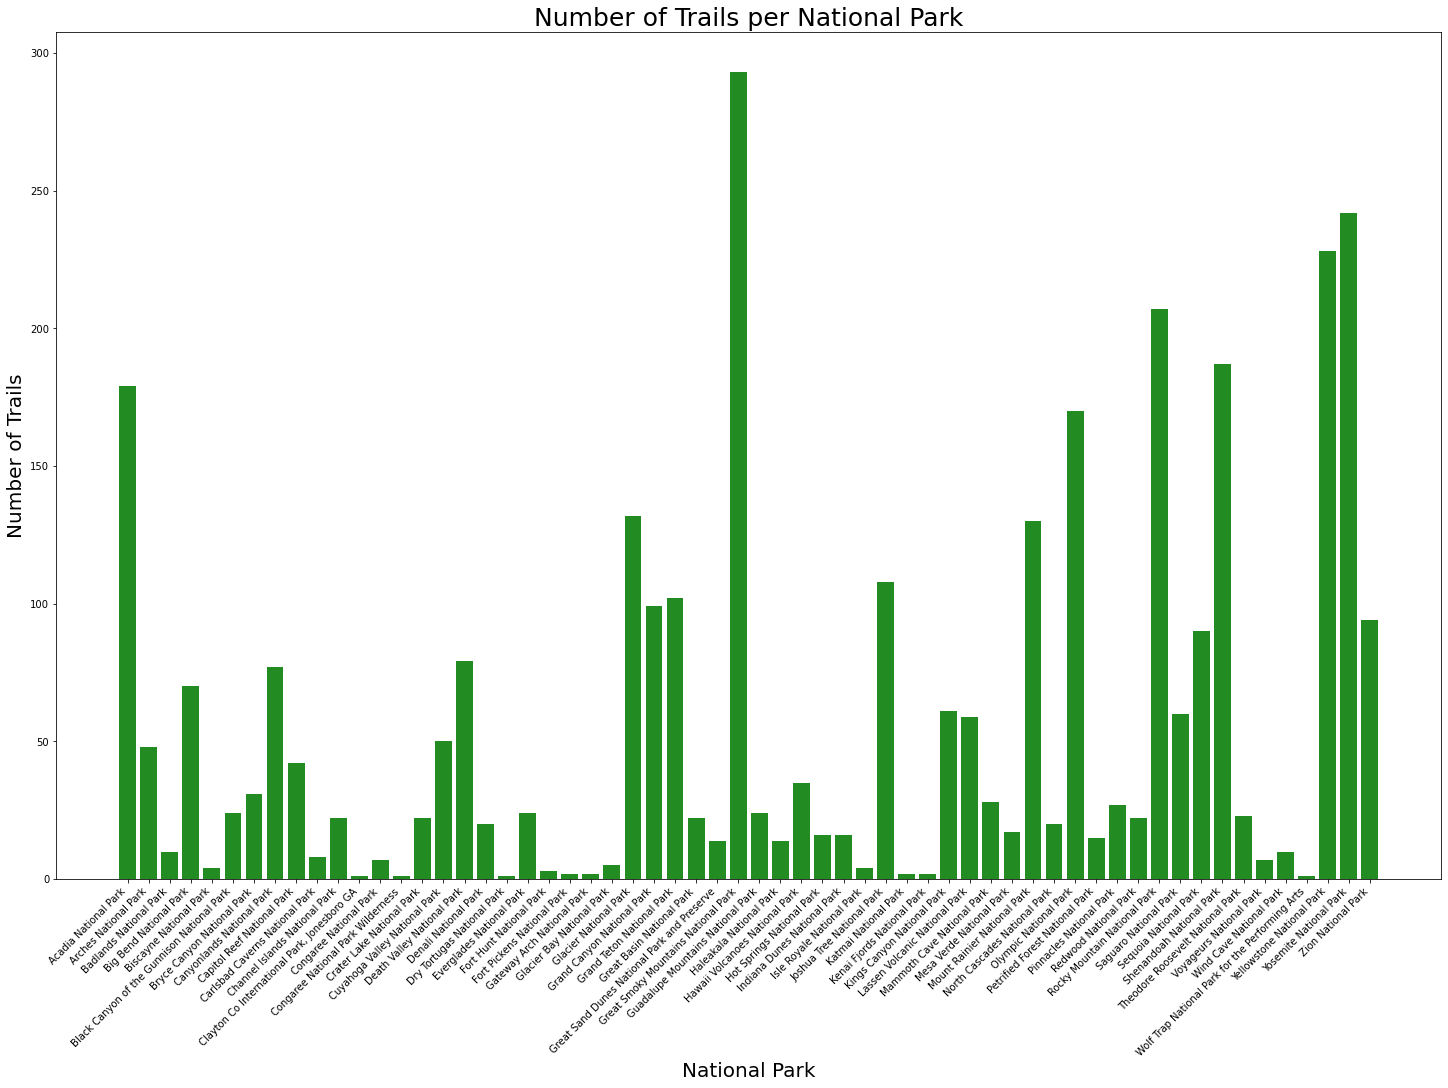

In [114]:
# Split of the parks and the counts
parks = list(by_park_count.keys())
counts = list(by_park_count.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (20, 15), layout = 'constrained')

# Create barchart
ax.bar(parks, counts, width = .8, color = 'ForestGreen')

# Customize labels
ax.set_xticks(parks, labelsize = 14)
ax.set_xticklabels(parks, rotation = 45, horizontalalignment='right')
ax.set_title("Number of Trails per National Park", fontsize = 25)
ax.set_xlabel("National Park", fontsize = 20)
ax.set_ylabel("Number of Trails", fontsize = 20)

#### Number of trails per Mountain Range

In [115]:
# Count the number of trails per Mountain Range
by_mtn_count = combined_trails_df.groupby('mtn_range')['trail'].count()

Text(0, 0.5, 'Number of Trails')

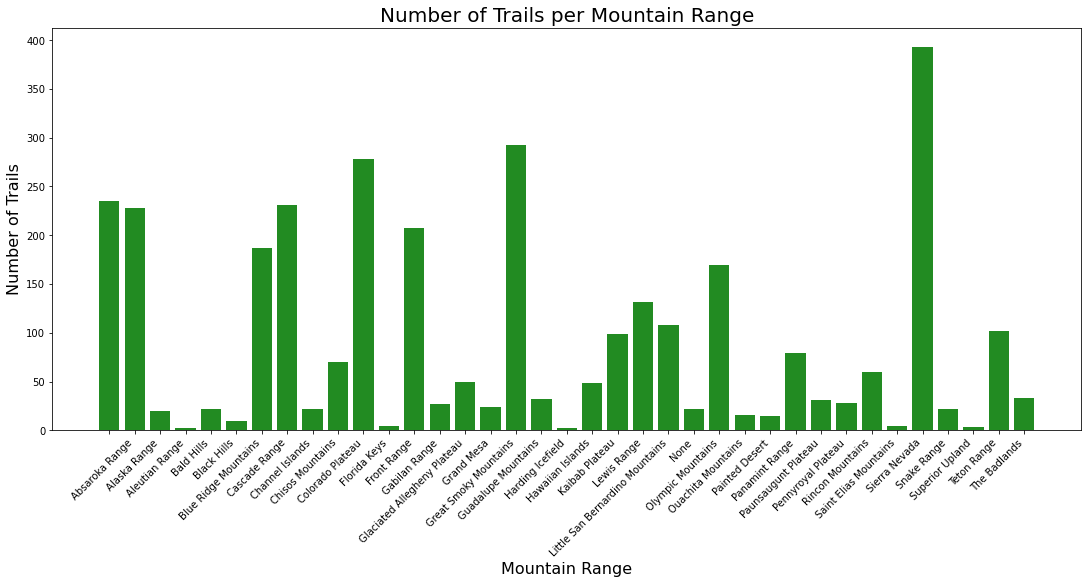

In [116]:
# Split of the mtn ranges and the counts
mtns = list(by_mtn_count.keys())
counts = list(by_mtn_count.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (15, 8), layout = 'constrained')

# Create barchart
ax.bar(mtns, counts, width = .8, color = 'ForestGreen')

# Customize labels
ax.set_xticks(mtns)
ax.set_xticklabels(mtns, rotation = 45, horizontalalignment='right')
ax.set_title("Number of Trails per Mountain Range", fontsize = 20)
ax.set_xlabel("Mountain Range", fontsize = 16)
ax.set_ylabel("Number of Trails", fontsize = 16)

#### Lowest Point and Max Elevation per National Park

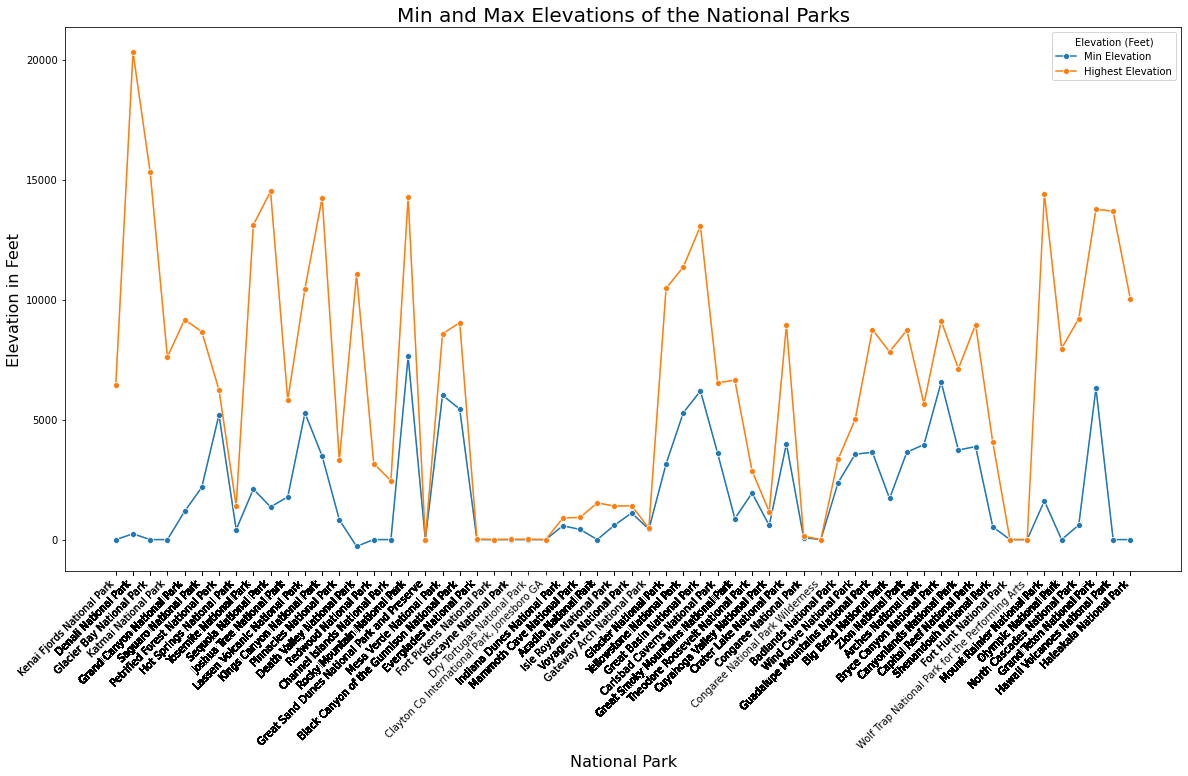

In [117]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.lineplot(x = "national_park", y = "min_elevation_feet" , data = combined_trails_df, 
             palette = "blue",ax = ax, label = 'Min Elevation', marker = 'o')
sns.lineplot(x = "national_park", y = "elevation_feet" , data = combined_trails_df, 
             palette = "red",ax = ax, label = 'Highest Elevation', marker = 'o')

# Customize labels
ax.set_xticks(combined_trails_df.national_park, labelsize = 10)
ax.set_xticklabels(combined_trails_df.national_park, rotation = 45, horizontalalignment='right')
ax.set_title("Min and Max Elevations of the National Parks", fontsize = 20)
ax.set_xlabel("National Park", fontsize = 16)
ax.set_ylabel("Elevation in Feet", fontsize = 16)
plt.legend(title = 'Elevation (Feet)')

plt.show()

#### Word Cloud of Activities from trails and parks combined

In [118]:
combined_trails_df['combined_activities']

0       Fly Fishing,Flying,Canoe or Kayak Camping,Guid...
1       Flying,Guided Tours,Arts and Culture,Bus/Shutt...
2       Fly Fishing,Flying,Canoe or Kayak Camping,Guid...
3       Flying,Guided Tours,Arts and Culture,Bus/Shutt...
4       Flying,Guided Tours,Arts and Culture,Bus/Shutt...
                              ...                        
3308                          birding,hiking,nature-trips
3309                           hiking,camping,backpacking
3310                                       hiking,walking
3311                                               hiking
3312                                               hiking
Name: combined_activities, Length: 3313, dtype: object

(-0.5, 1599.5, 799.5, -0.5)

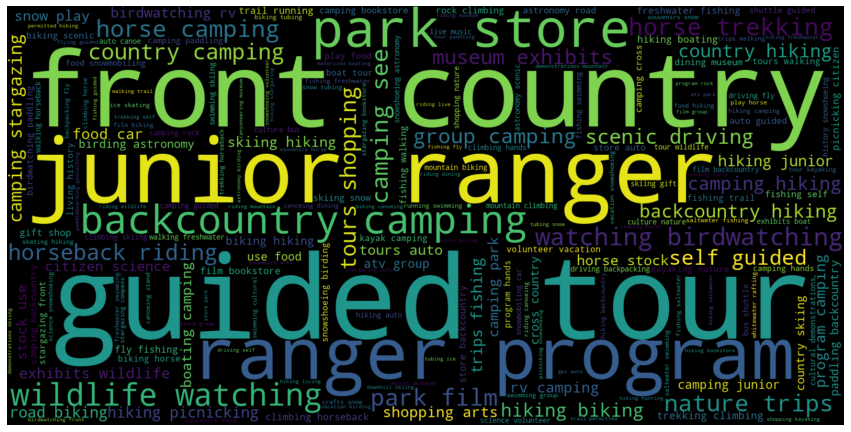

In [119]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator

activities_df = combined_trails_df.dropna(subset=['combined_activities'])

# Most frequent words in the Characteristics
word_string = " ".join(activities_df['combined_activities'].str.lower())
word_string = word_string.replace("'", "")

plt.figure(figsize=(15,15))

word_cloud = WordCloud(background_color = "black", width=1600, height=800)
word_cloud.generate(word_string)

plt.imshow(word_cloud.recolor(colormap = 'viridis' , random_state = 17), interpolation="bilinear")
plt.axis('off')

### Average Fees per National Park

Text(0, 0.5, 'Average Fee Cost')

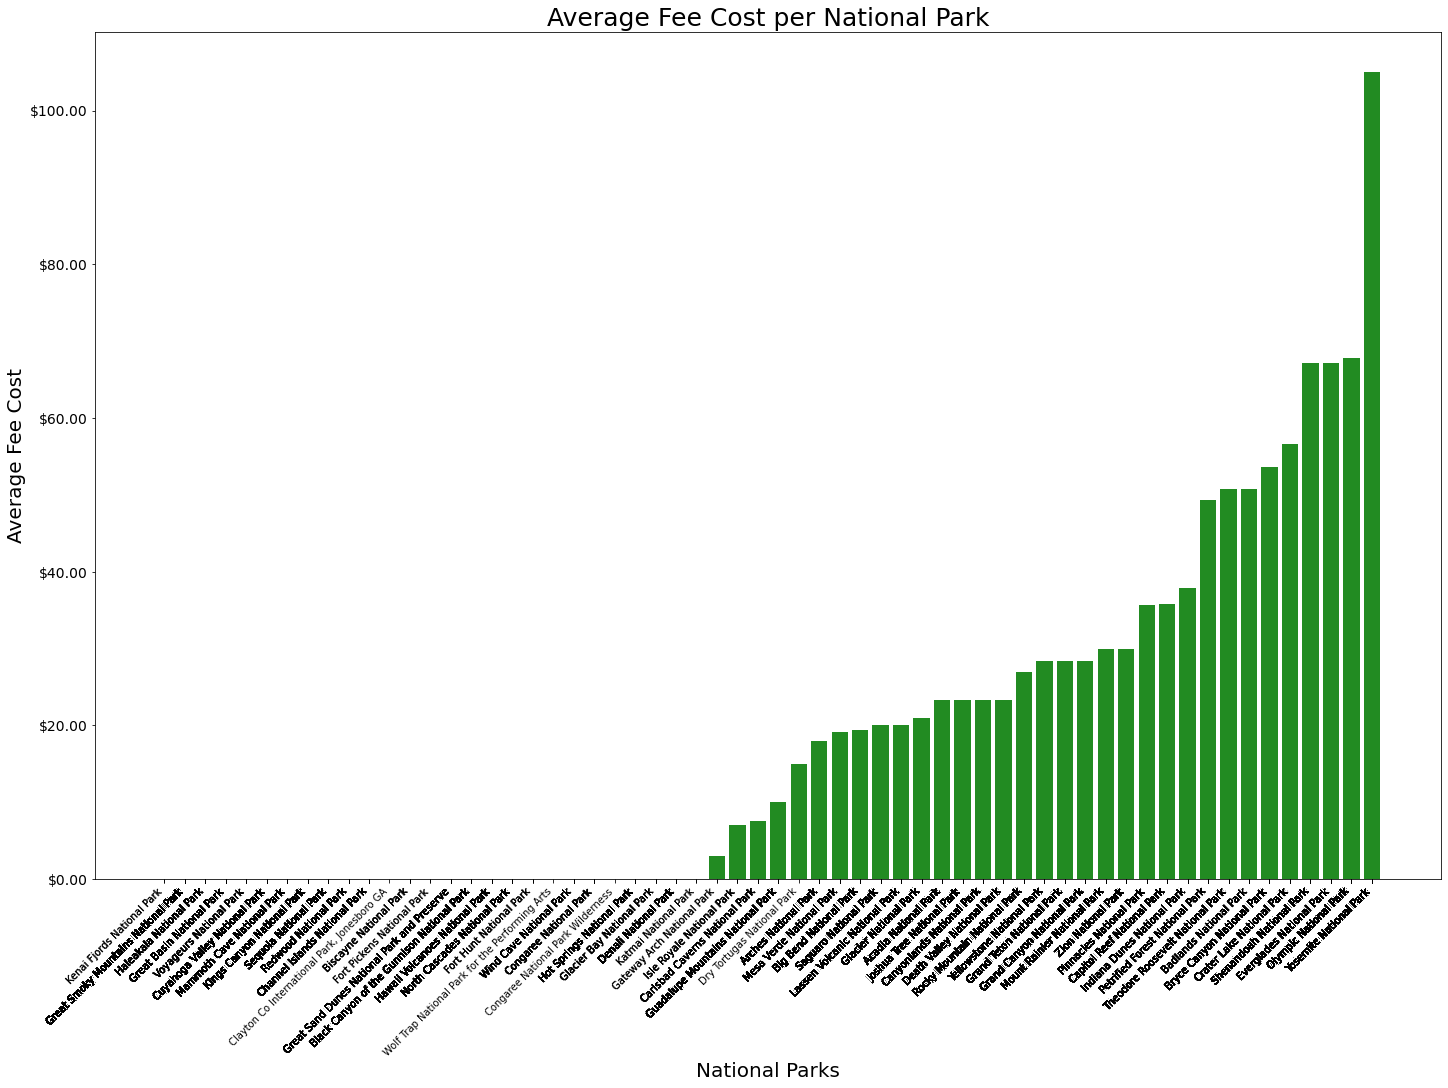

In [120]:
# Sort df by average fee cost
sorted_fees = combined_trails_df.sort_values('fees_avg_cost')

# Get values
fees = sorted_fees['fees_avg_cost']
parks = sorted_fees['national_park']

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (20, 15), layout = 'constrained')

# Create barchart
ax.bar(parks, fees, width = .8, color = 'ForestGreen')

# Customize labels
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.yaxis.set_tick_params(which='major', labelsize = 14)

ax.set_xticks(parks, labelsize = 12)
ax.set_xticklabels(parks, rotation = 45, horizontalalignment='right')
ax.set_title("Average Fee Cost per National Park", fontsize = 25)
ax.set_xlabel("National Parks", fontsize = 20)
ax.set_ylabel("Average Fee Cost", fontsize = 20)

### Step 7: Summary

Learning about data preparation and cleaning and merging three different types of data was fun and challenging.  I began with a CSV file found on Kaggle, then moved to a website table from Wikipedia, and finally, JSON data from an API found through the National Parks.  Each had its own quirks and challenges.

The CSV file seemed straightforward. I began by correcting Maui being a state, converting all measurements into feet, splitting out latitude and longitude into two separate features, cropped unneeded features, and renamed feature headers.  The unknown piece (didn’t realize it until I moved it up to a database) was the activities and features were strings and not lists as they appeared. I converted each feature to a comma delimited string to upload to the database table. The ethical considerations were that most of the information is user input, so the data is based on their experiences and data. This can be different from person to person.

The Wikipedia table had a lot of pulling out of data in each row/column.  I kept all features in feet and removed the data about meters. I also removed citations that may have been on the data. I renamed feature headers and made sure to change the national park header to match the CSV file. I also dropped features that were not needed. The ethical considerations were that this data is maintained by "the people". Although it is monitored, there may be inaccurate information on the table within Wikipedia.

The API data I used was national park information from the National Parks API. It was downloaded as JSON data and converted to a data frame. This was most challenging to prepare. I dropped features that were duplicates and not needed. I needed to convert topics and activities from dictionaries within a list to comma delimited strings. I removed data that had more than 40% of its data missing. I moved Entrance Fees and Passes to their own data frames as they had a lot more information that warranted their own tables. The ethical implications were that this data is provided by the National Parks and with any data, it may not be up to date so if you were to use it I would mention that the data may be outdated and to check with the National Park for verification.

With the five data frames in place, next, I created an SQLite database and created the five tables within. The data from the CSV file was the parent table and the four others had foreign keys pointing to the key:  national park.

Once the database was set up, I then downloaded the tables to one combined data frame. Here I combined and removed duplicates of the features activities that came from both the CSV file and the API. I also filled in some missing information that was going to be used for graphical analysis.

In summary, I learned a lot about getting data from multiple sources and how databases handle and what they can’t handle as far as the types of data it receives. Some data may look like one thing but really are something else and databases can’t handle lists. On another note, I learned that plotting data with a lot of features is very tricky! All in all, I really enjoyed this project and am glad I chose such challenging data.  It taught me a lot about python, pandas, seaborn, matplotlib, and SQL.